# Forest Fires

# Apartat (C): Analitzant Dades


Per la nostra pràctica utilitzarem una base de dades que proporciona informació sobre incendis forestals al parc de Montesinho. Aquestes dades han sigut obtingudes pels seus dos creadors Paulo Cortez i Aníbal Morais.

Abans de començar, realitzarem una primera visualització de les dades de la nostra base de dades.


In [61]:
# afegim llibreries necessaries
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns

# visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# llegim les dades del csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# carreguem dataset 
dataset = load_dataset('forestfires.csv')
data = dataset.values

In [62]:
print("Visualitzem les primeres 5 mostres de la BBDD:")
dataset.head() 

Visualitzem les primeres 5 mostres de la BBDD:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,oct,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,oct,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,mar,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,mar,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


Abans de treure cap conclusió  és necessari comprovar el tipus de variables que contenen les dades ja que principalment ens interessaran els valors numèrics 


In [63]:
# comprovar tipus de dades
dataset.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Com es pot observar, no totes les dades son de tipus numèric. Per tant, convertirem totes les dades a tipus numèric i posarem NaN en totes aquelles que no es pugui fer la conversió.


In [56]:
#convertir dades a tipus numèric
dataset = dataset.apply(pd.to_numeric, errors= 'coerce')
dataset.head()

#no tornar a executar 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,NaN,NaN,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,NaN,NaN,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,NaN,NaN,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,NaN,NaN,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,NaN,NaN,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


Com podem observar tots els valors de **month i day** s'han establert com a NaN ja que son strings. No considerem que s’han d’eliminar aquestes dades ja que ens resulten útils per realitzar estudis posteriorment i extreure conclusions per tant el que es farà serà transformar els mesos i dies en valors numèrics. 


In [64]:
import warnings
warnings.filterwarnings('ignore')
i = 0
while i < 517:
    if dataset['month'][i] == 'jan':
        dataset['month'][i] = 1
    elif dataset['month'][i] == 'feb':
        dataset['month'][i] = 2
    elif dataset['month'][i] == 'mar':
        dataset['month'][i] = 3
    elif dataset['month'][i] == 'apr':
        dataset['month'][i] = 4
    elif dataset['month'][i] == 'may':
        dataset['month'][i] = 5
    elif dataset['month'][i] == 'jun':
        dataset['month'][i] = 6
    elif dataset['month'][i] == 'jul':
        dataset['month'][i] = 7
    elif dataset['month'][i] == 'aug':
        dataset['month'][i] = 8
    elif dataset['month'][i] == 'sep':
        dataset['month'][i] = 9
    elif dataset['month'][i] == 'oct':
        dataset['month'][i] = 10
    elif dataset['month'][i] == 'nov':
        dataset['month'][i] = 11
    elif dataset['month'][i] == 'dec':
        dataset['month'][i] = 12
    i += 1

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,10,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,10,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,3,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,3,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


In [65]:
i = 0
while i < 517:
    if dataset['day'][i] == 'mon':
        dataset['day'][i] = 1
    elif dataset['day'][i] == 'tue':
        dataset['day'][i] = 2
    elif dataset['day'][i] == 'wed':
        dataset['day'][i] = 3
    elif dataset['day'][i] == 'thu':
        dataset['day'][i] = 4
    elif dataset['day'][i] == 'fri':
        dataset['day'][i] = 5
    elif dataset['day'][i] == 'sat':
        dataset['day'][i] = 6
    elif dataset['day'][i] == 'sun':
        dataset['day'][i] = 7
    i += 1
    
    
dataset["day"] = pd.to_numeric(dataset["day"])
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,10,2,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,10,6,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,3,5,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,3,7,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


A més hem canviat el tipus de dada de **month i day** per poder treballar amb valors de tipus numèric, ara en comptes de ser objects com hem vist abans, ara son de tipus int64.

In [66]:
# canvi de object a int64 dels atributs any i dia per poder treballar comodament
dataset["day"] = pd.to_numeric(dataset["day"])
dataset["month"] = pd.to_numeric(dataset["month"])
dataset.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

A més, hem considerat realitzar una sèrie més de canvis:

**1) Afegir columna “damage”**

A la base de dades no tots els incendis registrats representen danys al parc, per tant, anem a crear un nou atribut a la base de dades que ens ajuda a representar els danys amb una variable 0 (no danys) o 1 (danys) que ens indica si l’incendi ha suposat algun dany al parc.


In [67]:
def f_area(a):
    if a == 0.0:
        return 0
    else:
        return 1

dataset['damage'] = dataset['area'].apply(f_area)
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage
0,7,5,3,5,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000,0
1,7,4,10,2,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000,0
2,7,4,10,6,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000,0
3,8,6,3,5,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000,0
4,8,6,3,7,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000,0


**2) Afegir columna “damage_category”**

Hem decidit que crearem 5 nivells de risc en funció de les hectàrees cremades en cada incendi:
- El nivell zero serà el de **“Sense dany”**. 
- El primer nivell serà el **“Dany baix”**.
- El segon nivell  serà el **“Dany moderat”**. 
- El tercer nivell serà el **“Dany alt”**. 
- El quart nivell serà el **“Dany extrem”**.


In [72]:
#damage_category
def f_area_damage(a):
    if a == 0:
        return 0
    elif a < 1: 
        return 1
    elif a < 50:
        return 2
    elif a < 100:
        return 3
    else:
        return 4
    
dataset['damage_category'] = dataset['area'].apply(f_area_damage)


Després de realitzar tots els canvis pertinents, la nostra base de dades queda de la següent forma:

In [73]:
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage,damage_category
0,7,5,3,5,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000,0,0
1,7,4,10,2,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000,0,0
2,7,4,10,6,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000,0,0
3,8,6,3,5,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000,0,0
4,8,6,3,7,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000,0,0


No sempre totes les bases de dades tenen tots els atributs amb valors no existents, ja sigui per causa d’errors o de valors no introduïts, per tant és necessari comprovar si existeixen valors no existents.

In [74]:
# comptem els valors no existents
noExist = dataset.isnull().sum()
print(noExist)

X                  0
Y                  0
month              0
day                0
FFMC               0
DMC                0
DC                 0
ISI                0
temp               0
RH                 0
wind               0
rain               0
area               0
damage             0
damage_category    0
dtype: int64


Com podem observar tots els atributs de la nostra base de dades tenen el valors existents, per tant treballarem amb tots els valors i no eliminarem cap.

In [70]:
# anàlisis estadístic
dataset.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage,damage_category
count,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000
mean,4.669,4.300,7.476,4.259,90.645,110.872,547.940,9.022,18.889,44.288,4.018,0.022,12.847,0.522,1.060
std,2.314,1.230,2.276,2.073,5.520,64.046,248.066,4.559,5.807,16.317,1.792,0.296,63.656,0.500,1.092
min,1.000,2.000,1.000,1.000,18.700,1.100,7.900,0.000,2.200,15.000,0.400,0.000,0.000,0.000,0.000
25%,3.000,4.000,7.000,2.000,90.200,68.600,437.700,6.500,15.500,33.000,2.700,0.000,0.000,0.000,0.000
50%,4.000,4.000,8.000,5.000,91.600,108.300,664.200,8.400,19.300,42.000,4.000,0.000,0.520,1.000,1.000
75%,7.000,5.000,9.000,6.000,92.900,142.400,713.900,10.800,22.800,53.000,4.900,0.000,6.570,1.000,2.000
max,9.000,9.000,12.000,7.000,96.200,291.300,860.600,56.100,33.300,100.000,9.400,6.400,1090.840,1.000,4.000


A continuació, mirem la correlació entre els atributs.


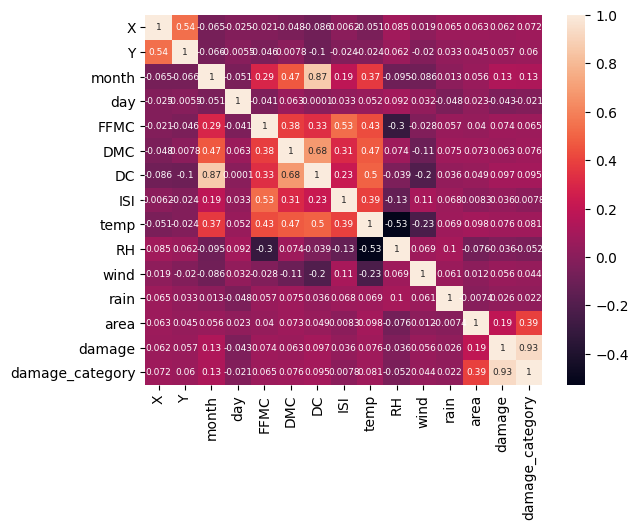

In [9]:
# mirem la correlació entre els atributs 
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, annot_kws={"size": 6.5})

A primera vista, podem observar com alguns atributs tenen una correlació notable que a priori ens permetrà fer prediccions.

Una vegada perfeccionada la base de dades és quan es comença l'anàlisis de les dades:


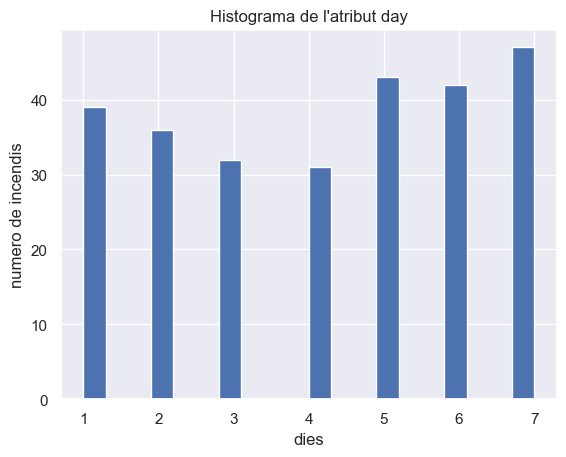

In [76]:
dataIncendis = dataset[dataset.damage == 1]
days = dataIncendis['day']
plt.figure()
plt.title("Histograma de l'atribut day")
plt.xlabel("dies")
plt.ylabel("numero de incendis")
hist = plt.hist(days,20)

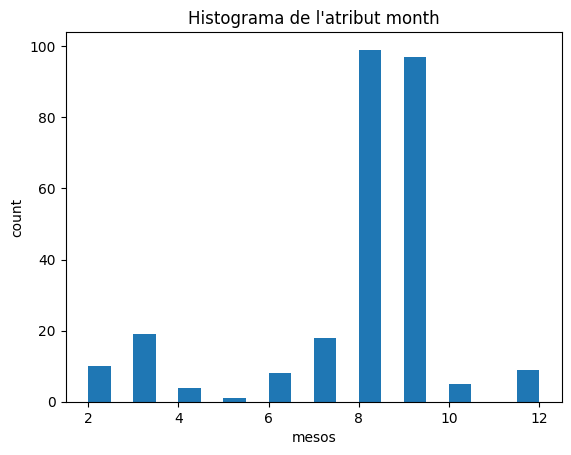

In [11]:
month = dataIncendis['month']
plt.figure()
plt.title("Histograma de l'atribut month")
plt.xlabel("mesos")
plt.ylabel("count")
hist = plt.hist(month,20)

Hem començat fent un análisis bàsic realitzant dos histogrames. L’objectiu era comprobar quan hi havia un registre de més casos d’incendis a la base de dades depenent del mes o del dia de la setmana. Com podem observar a la primera gràfica es pot veure que hi ha més casos registrats de divendres a dilluns però, en aquest cas en concret, no hi existeix una diferencia significativa entre tots els dies de la setmana. En canvi, en la segona gràfica observem com en els mesos d’agost i setembre hi ha una gran diferencia en el número de casos enregistrats en comparació als altres mesos de l’any. A més, al Gener i al Novembre no figura ningun cas d’indenci.

Però després de fer aquesta observació, vam voler comprovar si la temperatura era un factor a tenir en compte alhora de relacionar-la amb la probabilitat d’incendi ja que al mesos d’estiu, on a priori la temperatura és més elevada, el nombre d’incendis era major. Per tant, vam realitzar la següent gràfica per comprovar-ho:

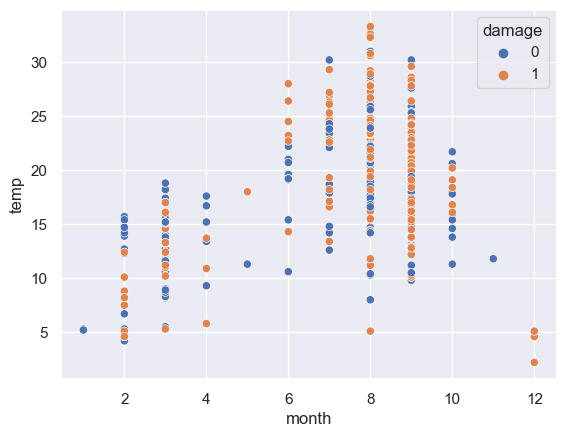

In [13]:
sns.set_theme()
sns.scatterplot(data=dataset, x='month', y='temp', hue='damage')
plt.show()

En aquest gràfic podem observar les temperatures que hi havien als incendis que es van provocar als diferents mesos, els punts que son de color blau son els registres de la base de dades on l’àrea cremada es 0 i els punts taronges son els registres de la base de dades on va haver-hi un incendi amb àrea > 0.

Com podem observar en aquest gràfic, com ja ens imaginavem la temperatura és un factor rellevant alhora de predir els incendis. Es pot veure com els mesos on les temperatures son més elevades, el numero d’incendis es major, per tant podem deduir que un factor que important de la provocació d’un incendi es la temperatura.


Però és veritat que amb tot això no podem saber la gravetat de l’incendi el qual és un factor a tenir en compte, per tant haurem de realitzar un altre estudi per veure l’impacte de cadascún del incendis produïts.

<Figure size 640x480 with 0 Axes>

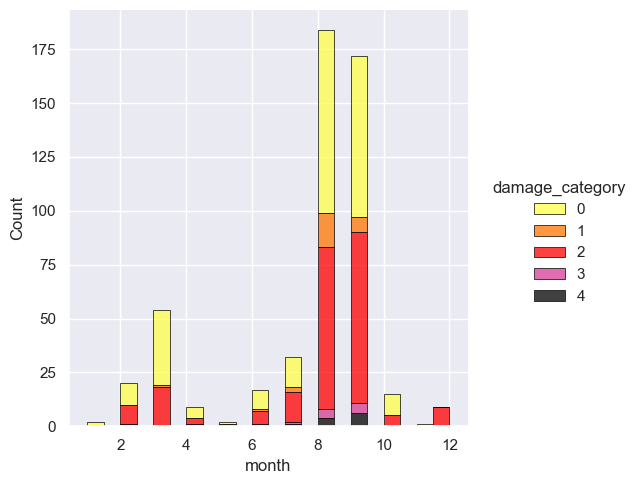

In [15]:
plt.figure()
p = ["#FFFF48", "#FF7600", "#FF0000", "#D43D94", "#000000"]
sns.displot(dataset, x='month', hue='damage_category',binwidth=0.5,multiple="stack", palette=p, edgecolor='black', 
linewidth=0.5)
plt.show()

Com podem observar, en general durant tot l’any el nivell dels incendis no arriba a ser mai de categoria 3 o superior, només en Agost i Setembre succeeixen de categoria 3 i 4 segurament, com s’ha vist anteriorment, a conseqüència de les altes temperatures. En la majoria dels casos és de categoria 2 o 0 i molt poques vegades els incendis són de categoria 1.  
També podem observar que encara que en Agost i Setembre el nombre d’incendis és molt elevat, la gran mayoria d’aquest no són d’un dany alt o extrem sinó que són de dany moderat.


La pluja es un factor important i  interessant a estudiar per entendre també la base de dades. Visualitzarem s’hi ha casos d’incendis els dies que ha hagut una pluja ínfima com a mínim.  

<Figure size 640x480 with 0 Axes>

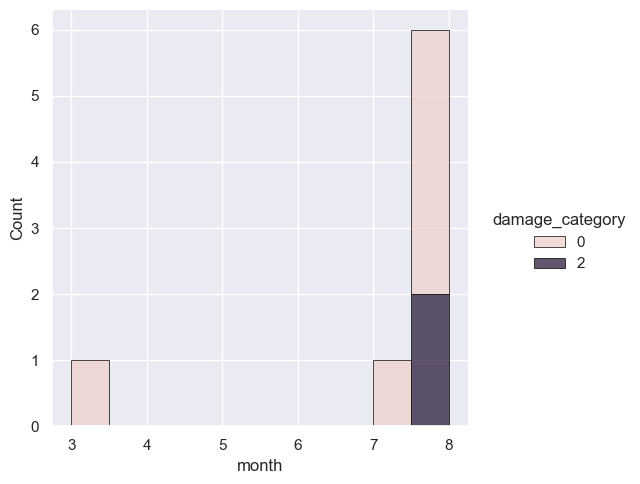

In [16]:
dataRain = dataset[dataset.rain > 0]
plt.figure()
#p = ["#FFFF48", "#FF7600", "#FF0000", "#D43D94", "#000000"]
sns.displot(dataRain, x='month', hue='damage_category',binwidth=0.5,multiple="stack", edgecolor='black', 
linewidth=0.5)
plt.show()

Es interessant veure com la gran mayoria de casos amb pluja han sigut de categoria 0, és a dir, sense danys. Però la resta ha sigut de categoria 2 i no de categoria 1, llavors és interessant estudiar el perquè d'això. A continuació veurem les dades dels dos casos anteriors.

In [17]:
dataIncendis2Rain = dataRain[dataRain.damage_category == 2]
dataIncendis2Rain

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage,damage_category
499,7,5,8,2,96.100,181.100,671.200,14.300,27.300,63,4.900,6.400,10.820,1,2
509,5,4,8,5,91.000,166.900,752.600,7.100,21.100,71,7.600,1.400,2.170,1,2


Per al primer cas podem veure com els valors d’humitat (FFMC, DMC i RH) son forza elevats deguts a la pluja, aquest valors no serien uns valors per catalogar un incendi en categoria 2 pero com es pot veure els valors de sequedat (DC) son força elevats conjuntament amb la temperatura (quan s’aproxima a 30 la podem considerar com molt elevada per un incendi), això ens fa obtenir una velocitat de propagació (ISI) casi extrema combinat amb un vent superior a la mitja. Finalment, amb l'anàlisi d’aquests valors i veient la quantitat d'hectàrees cremades té sentit que estigui en categoria 2.
Per al segon cas, podem observar que degut a una menor quantitat de pluja i uns valors de sequedat pràcticament extrems son els causants de la crema d’aquesta quantitat d'hectàrees i per tant la categoria 2.


Per altre banda, els mesos on es registren més casos d’incendis sense danys també coincideix amb els mesos on es registren més incendis amb danys com s’ha pogut veure anteriorment, és a dir, els mesos d’Agost i Setembre. A continuació analitzarem a que es degut aquest fenomen.

Els factors que s’han de tenir més en compte en aquest cas son la pluja i les humitats (FFMC, DMC, RH). 


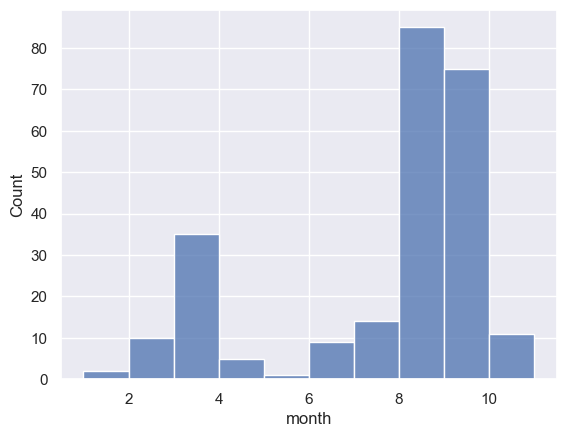

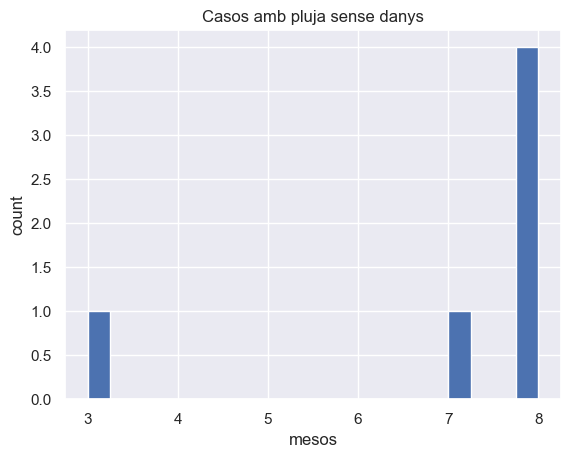

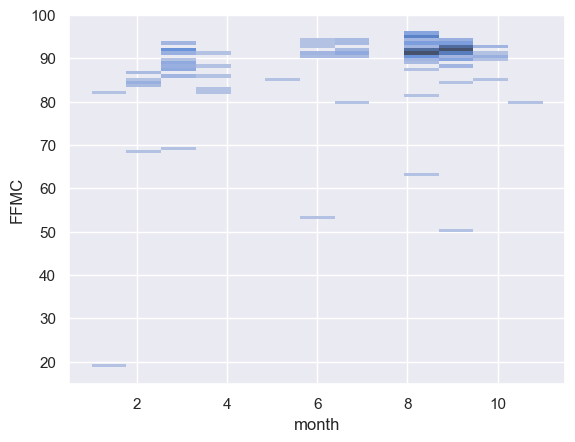

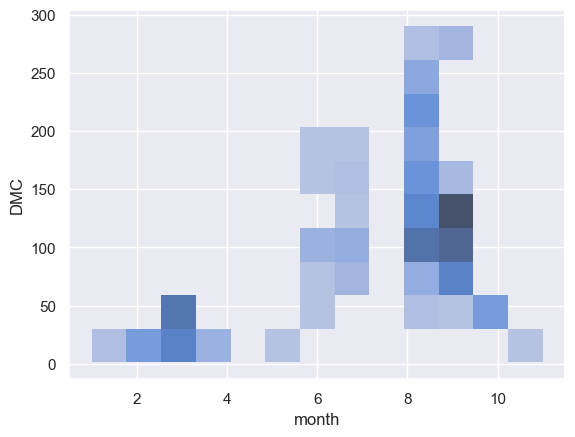

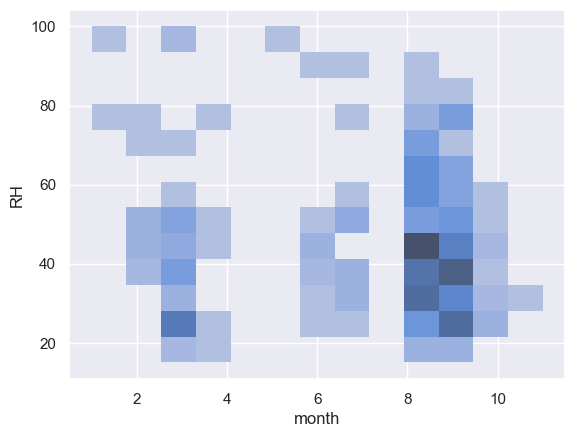

In [18]:
dataIncendisNoDamage = dataset[dataset.damage == 0]
pluja = dataIncendisNoDamage[dataIncendisNoDamage.rain > 0]
dataIncendisNoDamageH = dataIncendisNoDamage[["month","FFMC","DMC","RH"]]

#incendis sense danys
sns.histplot(data=dataIncendisNoDamage, x="month", binwidth=1)
plt.show()

#incendis amb pluja sense danys
plt.figure()
plt.title("Casos amb pluja sense danys")
plt.ylabel("count")
plt.xlabel("mesos")
hist = plt.hist(pluja['month'],20)
plt.show()

#FFMC
sns.histplot(data=dataIncendisNoDamageH, x="month", y="FFMC", stat='count')
plt.show()
#DMC
sns.histplot(data=dataIncendisNoDamageH, x="month", y="DMC", stat='count')
plt.show()
#RH
sns.histplot(data=dataIncendisNoDamageH, x="month", y="RH", stat='count')
plt.show()


Analitzant les gràfiques podem concloure que els casos de incendis sense danys produits als mesos d’Agost i Setembre son deguts per dos motius. Per una banda, trobem que la majoria dels casos amb pluges han ha sigut produits a l’Agost, factor important que intervé tant en la perillositat com els danys d’un incendi. Per altre banda, en els dos mesos esmentats anteriorment es on es registren els valors més alts de les tres humitats (a excepció del RH que també hi han registrats valors elevats a altres mesos pero menys quantitat de casos) i on es troben el mayor número de casos d'incendis sense danys amb humitats (representats amb colors més foscos).

A més, realitzarem un pairplot per visualitzar els atributs que estan relacionats entre si.

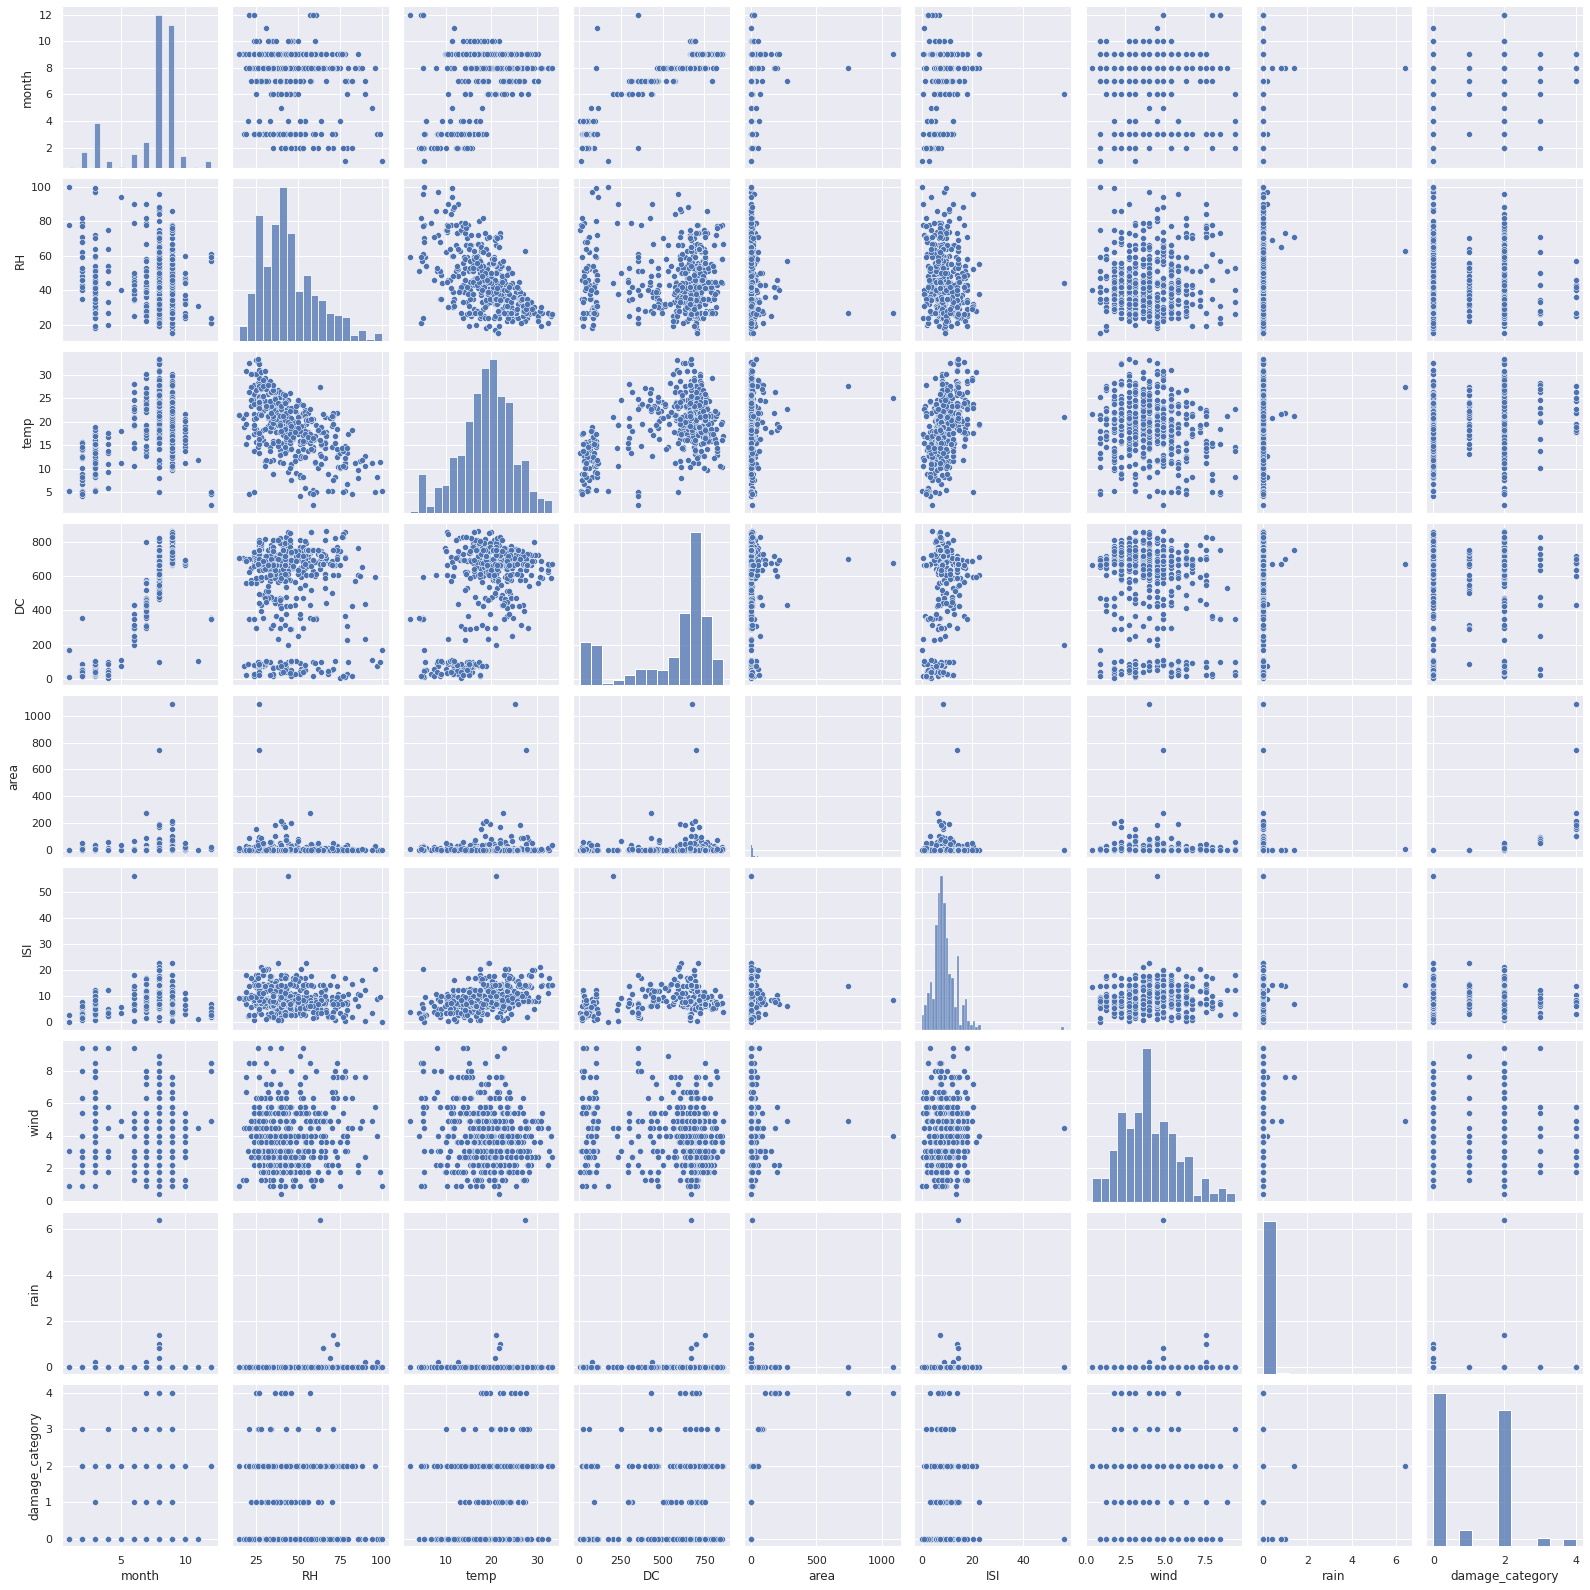

In [25]:
sns.pairplot(dataset[['month','RH','temp','DC','area','ISI','wind','rain', 'damage_category']])
plt.show()

Per a fer un model de regressió lineal el que més interessa són les dades de tipus continues, dades les quals es poden mesurar (temp, ISI, …), perquè són les que normalment s’han de predir per extreure conclusions, donen més informació rellevant i serveixen per a realitzar regressions.

Mirarem si aquestes dades continues tenen una distribució normal ja que si la tenen això afavoreix alhora de la creació d’un model de regressió lineal. Això és degut a que la regressió és un anàlisi lineal i, per això, treballa amb relacions lineals. Quan els errors de les variables tenen distribució no normal, poden afectar les relacions i la significació.


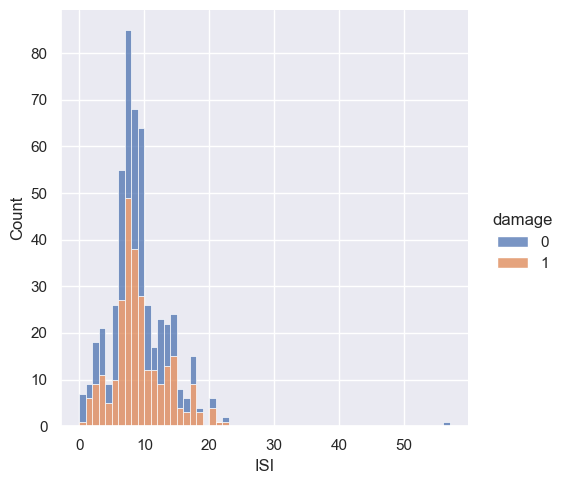

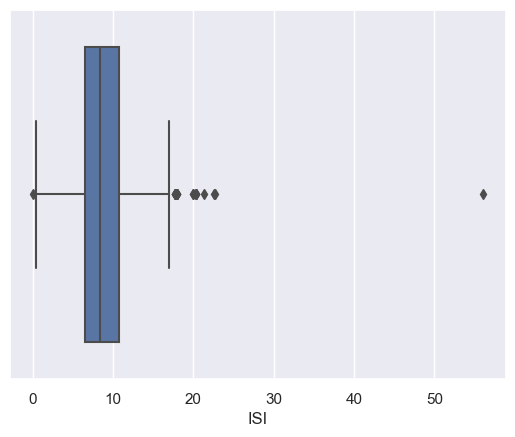

In [19]:
sns.displot(dataset, x='ISI', hue='damage', binwidth=1, multiple="stack")
plt.show()
sns.boxplot(x=dataset["ISI"])
plt.show()

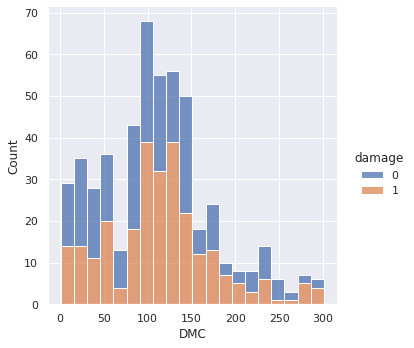

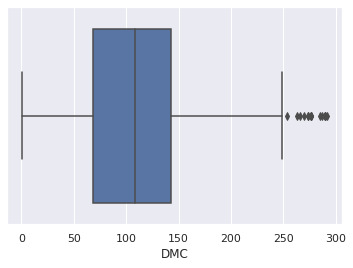

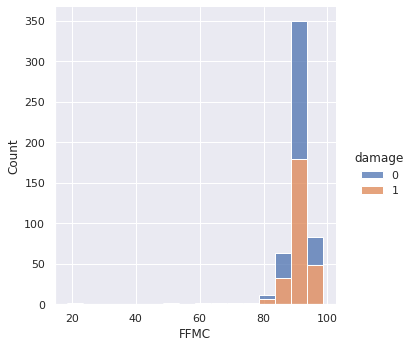

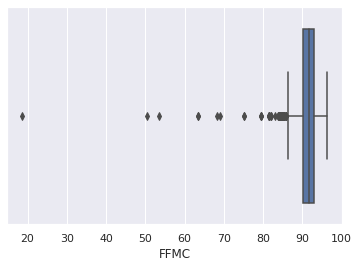

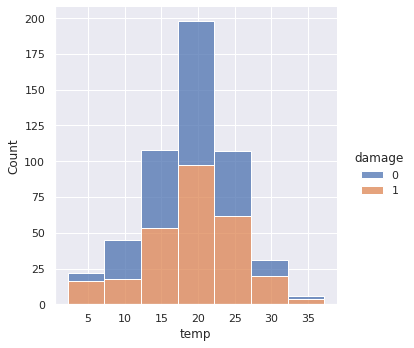

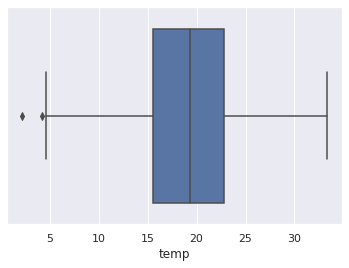

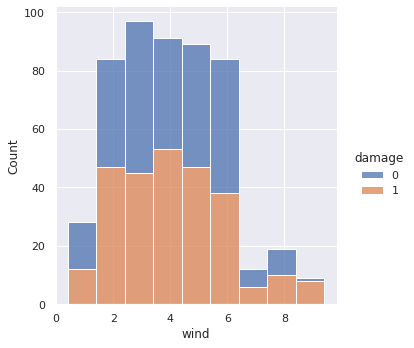

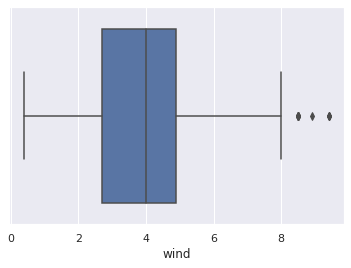

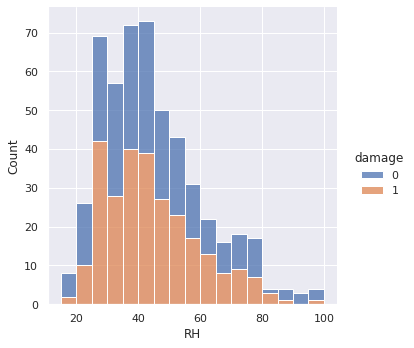

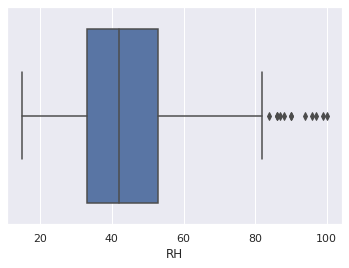

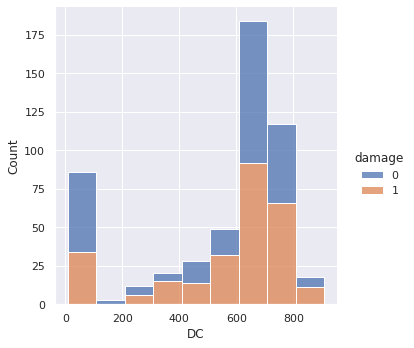

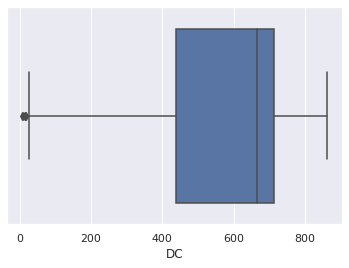

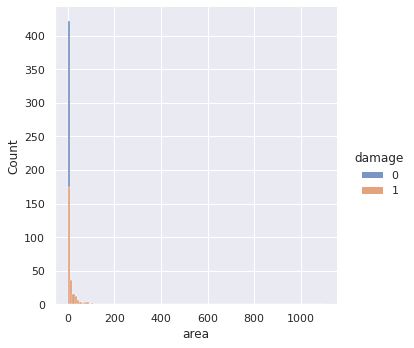

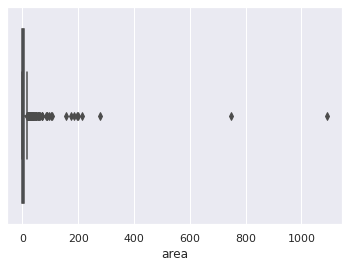

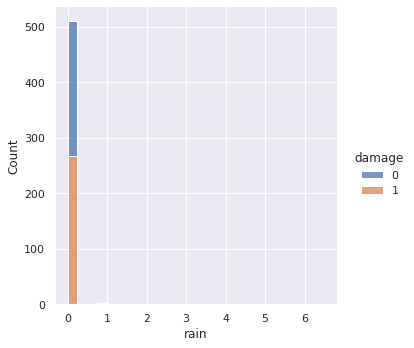

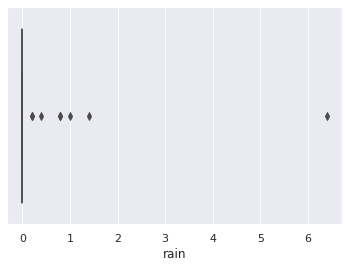

In [26]:
#mirem distribució normal dels atributs
sns.displot(dataset, x='DMC', hue='damage', binwidth=15, multiple="stack")
plt.show()

sns.boxplot(x=dataset["DMC"])
plt.show()

sns.displot(dataset, x='FFMC', hue='damage', binwidth=5, multiple="stack")
plt.show()

sns.boxplot(x=dataset["FFMC"])
plt.show()

sns.displot(dataset, x='temp', hue='damage', binwidth=5, multiple="stack")
plt.show()

sns.boxplot(x=dataset["temp"])
plt.show()

sns.displot(dataset, x='wind', hue='damage', binwidth=1, multiple="stack")
plt.show()

sns.boxplot(x=dataset["wind"])
plt.show()

sns.displot(dataset, x='RH', hue='damage', binwidth=5, multiple="stack")
plt.show()
sns.boxplot(x=dataset["RH"])
plt.show()

sns.displot(dataset, x='DC', hue='damage', binwidth=100, multiple="stack")
plt.show()
sns.boxplot(x=dataset["DC"])
plt.show()

sns.displot(dataset, x='area', hue='damage', binwidth=10, multiple="stack")
plt.show()
sns.boxplot(x=dataset["area"])
plt.show()

sns.displot(dataset, x='rain', hue='damage', binwidth=0.25, multiple="stack")
plt.show()
sns.boxplot(x=dataset["rain"])
plt.show()

Com es pot observar, els atributs que tenen una distribució Gaussiana són: ISI, FFMC i la temp (temperatura). El DMC és veritat que s’apropa a ser una distribució Gaussiana però no acaba de ser-ho.

El nostre objectiu és la predicció d’un atribut. A la nostra base de dades tenim una gran quantitat de d’atributs que a primera vista no son interessants per predir ja que son valors que es mesuren, s’identifiquen o es poden obtenir amb facilitat (com podria ser la temperatura, les humitats…). En canvi, trobem dos valors que sí que són interessants. Aquests dos són el ISI i l'àrea, però s’ha decidit seleccionar el ISI (velocitat de propagació del foc) ja que segueix una distribució normal i pot tindre més correlació amb altres atributs ja que es un índex resultat del càlcul dels mateixos (vent, FFMC, temperatura, …) per obtenir un baix error de predicció i fer una bona predicció. Per tant, el nostre valor objectiu serà l’ ISI.

# Apartat (B): Primeres regressions

Primerament, importarem el codi necessari per poder calcular el MSE, per generar una regressió lineal, per poder realitzar una estandardització i per calcular el coeficient de determinació (R2). 
Per avaluar l’ajustament d’un model es calcula l’error quadràtic mitjà (MSE) i el coeficient de determinació (R2) del model. El millor valor possible per aquest últim és 1.0. En quant al MSE, quant més petit sigui millor serà.


In [20]:
import math
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.warnings.filterwarnings('ignore')

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()
    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)
    # Retornem el model entrenat
    return regr

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

Com s’ha esmentat anteriorment a l’apartat C i al enunciat de la pràctica, els atributs més importants i millors per fer una bona predicció són aquells que segueixen una distribució normal. En el nostre cas, aquests serien el FFMC i la temp (temperatura). Aquests atributs seran les mostres que s’utilitzaran en el regresor (les “x”).

Per a calcular quin atribut assoleix un MSE menor s’ha creat aquest codi on s’ha realitzat train i test per obtenir un càlcul més exacta del MSE i on també es mostra el R2 de cada atribut. 

Error en atribut 0: 9.860753
R2 score en atribut 0: 0.452430
Error en atribut 1: 14.567071
R2 score en atribut 1: 0.191087
Error en atribut 2: 16.333013
R2 score en atribut 2: 0.093024
Error en atribut 3: 13.511494
R2 score en atribut 3: 0.249704
Error en atribut 4: 18.671754
R2 score en atribut 4: -0.036847
Error en atribut 5: 17.905212
R2 score en atribut 5: 0.005720
Error en atribut 6: 18.701823
R2 score en atribut 6: -0.038516
Error en atribut 7: 18.273045
R2 score en atribut 7: -0.014706


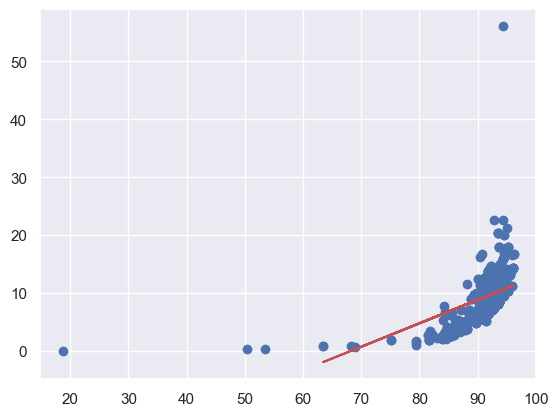

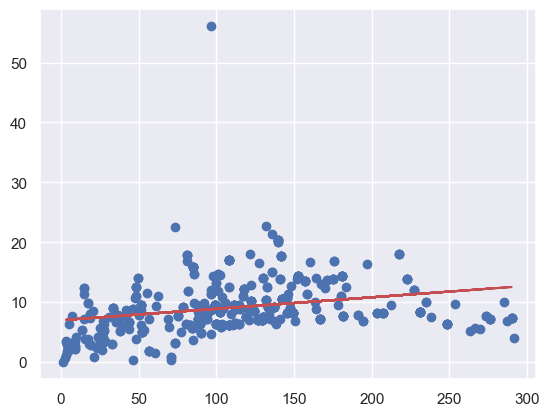

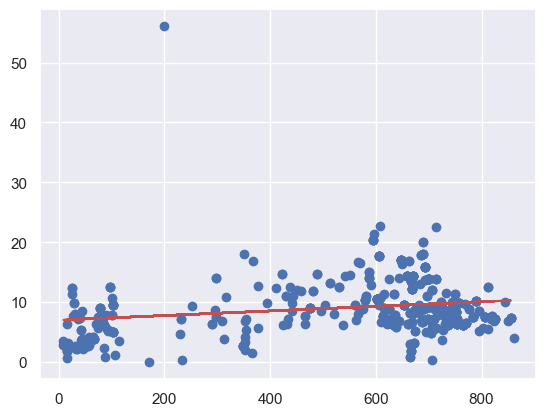

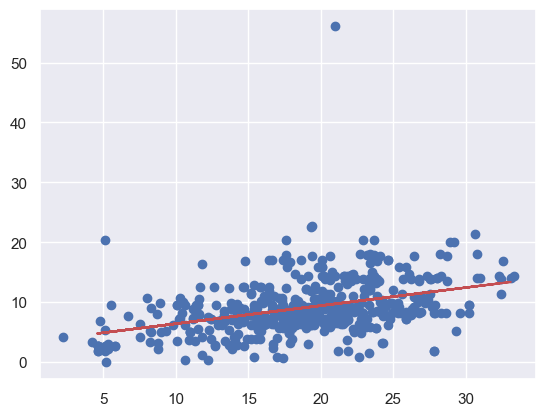

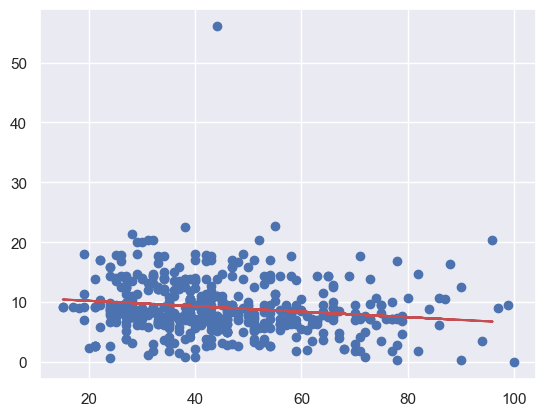

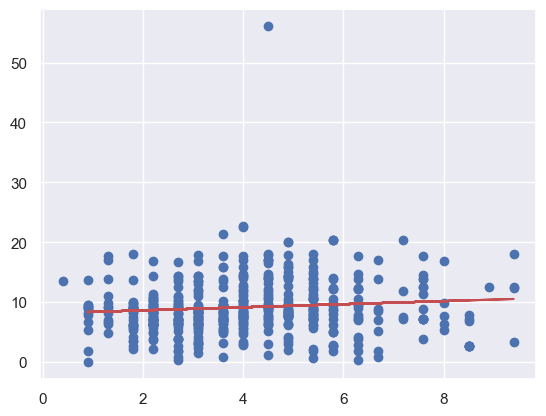

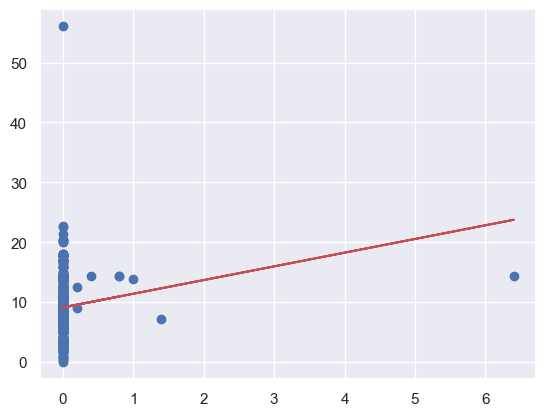

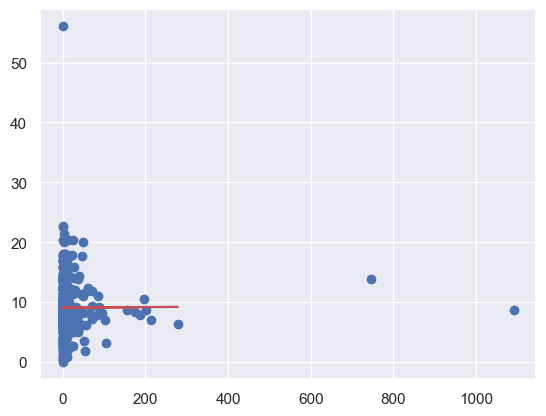

In [21]:
data = dataset.values
#datax = data[(data[:,7] < 30)]
x = data[:,[4,5,6,8,9,10,11,12]] #FFMC, DMC, DC, temp, RH, wind, rain, area 12
y = data[:,7] #ISI 7

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=39) #39

for i in range(x_train.shape[1]):
    x_tr = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_te = x_test[:,i] # seleccionem atribut i en conjunt de test.
    x_tr = np.reshape(x_tr,(x_tr.shape[0],1))
    x_te = np.reshape(x_te,(x_te.shape[0],1))

    regr = regression(x_tr, y_train)
    predicted = regr.predict(x_te)
    error = mse(y_test, regr.predict(x_te)) # calculem error
    r2 = r2_score(y_test, regr.predict(x_te))
    
    plt.figure()
    ax = plt.scatter(x[:,i], y)
    plt.plot(x_te, predicted, 'r')
    
    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))

Es pot observar que l’atribut amb MSE menor i major R2 és l’atribut 0 el qual correspon al FFMC.

Els valors de MSE i R2 d’aquest atribut és veritat que no són baixos però tampoc és d’un model perfecte. Això és degut a que al estar tractant amb processos físics i mediambientals és necessari obtenir un R2 més elevat perquè necessitem una major precisió. Si estiguéssim intentant predir el comportament humà amb un R2 com el del nostre cas (0.45) seria suficient ja que és molt difícil predir els éssers humans.

A continuació mirarem la correlació dels atributs que hem estudiat amb anterioritat per obtenir el menor MSE.


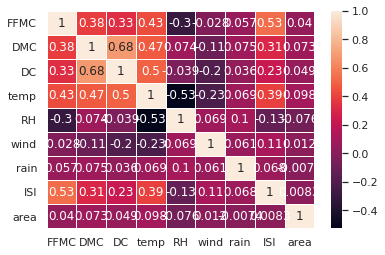

In [29]:
correlacio = dataset[['FFMC','DMC','DC','temp','RH','wind','rain','ISI','area']].corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Si observem l’ISI, podem veure com té la major correlació amb el FFMC, el qual com s’ha vist anteriorment era l’atribut amb menor MSE. També podem observar com el segon cas on menor MSE hi havia era a la temperatura i coincideix amb que és el segon atribut amb més correlació amb l’ISI. Per tant, aquesta gràfica dóna sentit als resultats anteriors.

A continuació, normalitzarem els atributs per poder intentar trobar un millor model de regressió ja que algunes de les conseqûencies de no normalitzar dades poden ser inexactitud de dades i/o ineficiència d’operacions. Bàsicament, la normalització pot aconseguir que hi hagi una millora en la predicció.

Error en atribut 0: 0.754151
R2 score en atribut 0: -0.683570
Error en atribut 1: 0.075085
R2 score en atribut 1: 0.832381


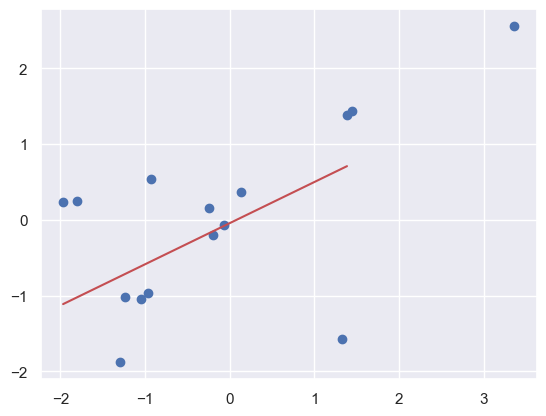

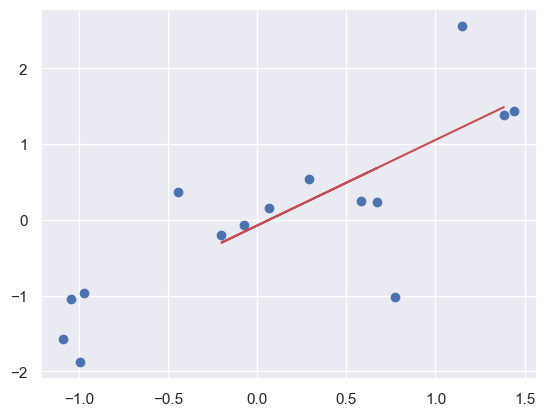

In [23]:
#normalitzar
data = dataset.values
normal = []
for i in range(data.shape[1]):
    normal.append(standarize(data[:,[i]]))

normal_np = np.array(normal)

#regressio

x = normal_np[:,[4,8]] #FFMC, temp
y = normal_np[:,7] #ISI


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=39) #39

for i in range(x_train.shape[1]):
    x_tr = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_te = x_test[:,i] # seleccionem atribut i en conjunt de test.
    x_tr = np.reshape(x_tr,(x_tr.shape[0],1))
    x_te = np.reshape(x_te,(x_te.shape[0],1))

    regr = regression(x_tr, y_train)
    predicted = regr.predict(x_te)
    error = mse(y_test, regr.predict(x_te)) # calculem error
    r2 = r2_score(y_test, regr.predict(x_te))
    
    plt.figure()
    ax = plt.scatter(x[:,i], y)
    plt.plot(x_te, predicted, 'r')
    
    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))

Com podem observar, comparant aquests resultats amb els resultats sense normalitzar veiem que hi ha un descens en el MSE i ha augmentat en valor absolut el R2. Això significa que el model ha millorat degut a la normalització. Però si ens fixem, ara l’atribut 0 no és el que dona millors resultats sinò que és l’atribut 1, la temp.

Per seguir buscant el millor model possible filtrarem les dades, és a dir, descartarem les dades amb valors extrems o que són anormals de la nostra base de dades.


Error en atribut 0: 7.015223
R2 score en atribut 0: 0.534304
Error en atribut 1: 13.743995
R2 score en atribut 1: 0.087624


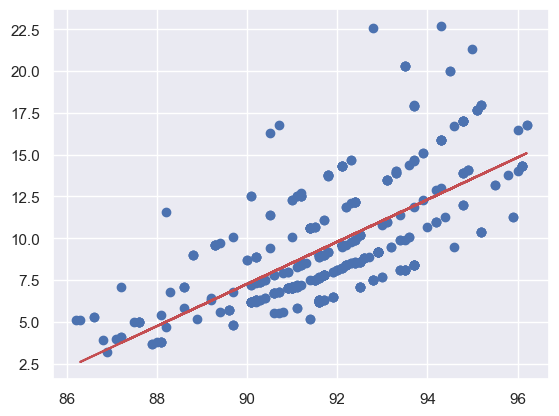

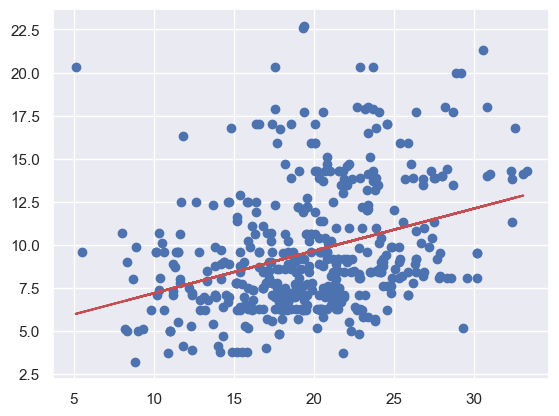

In [26]:
#filtrar resultats
data = dataset.values
dataFiltrat = data[ ( data[:,4] > 86) & (data[:,8] > 5) & (data[:,7] < 30)]
x = dataFiltrat[:,[4,8]] #FFMC, temp 
y = dataFiltrat[:,7] #ISI 

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=39) #39

for i in range(x_train.shape[1]):
    x_tr = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_te = x_test[:,i] # seleccionem atribut i en conjunt de test.
    x_tr = np.reshape(x_tr,(x_tr.shape[0],1))
    x_te = np.reshape(x_te,(x_te.shape[0],1))

    regr = regression(x_tr, y_train)
    predicted = regr.predict(x_te)
    error = mse(y_test, regr.predict(x_te)) # calculem error
    r2 = r2_score(y_test, regr.predict(x_te))
    
    plt.figure()
    ax = plt.scatter(x[:,i], y)
    plt.plot(x_te, predicted, 'r')
    
    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))


Com es pot observar el model ha millorat lleugerament respecte el model inicial però no podem dir que ha sigut una millora significativa ni és millor que el model normalitzat. Això és degut que hi havia certs valors anormals que influenciaven a l’hora de realitzar el model però no hi havia una gran quantitat d’ells.

El següent model que s’ha provat per intentar trobar un millor model ha sigut el PCA. El que es fa amb PCA és reduir la dimensió de les dades de entrada, en el nostre cas la reduïm a 2, i normalitzar les dades.

Error en atribut 0: 12.623403
R2 score en atribut 0: 0.299020
Error en atribut 1: 18.662629
R2 score en atribut 1: -0.036340


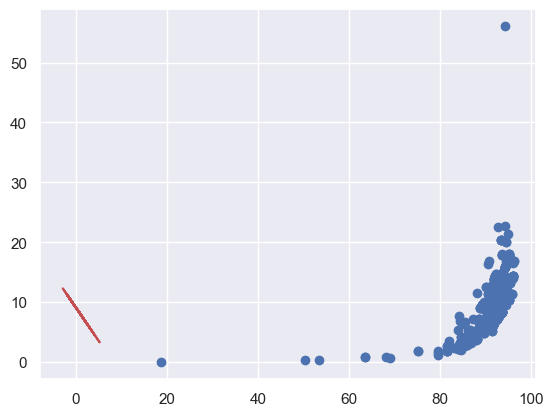

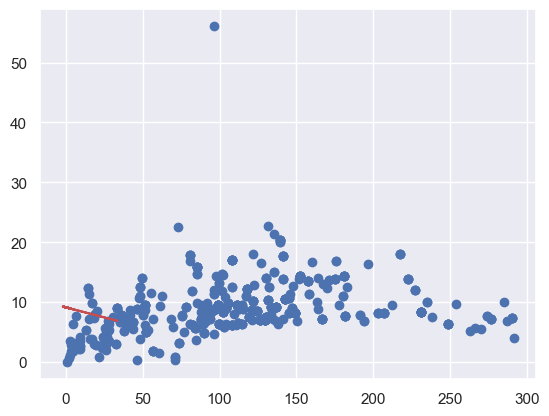

In [52]:
data = dataset.values
x = data[:,[4,5,6,8,9,10,11,12]] #FFMC, DMC, DC, temp, RH, wind, rain, area,
y = data[:,7]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.20, random_state=39)

#estandartizem escales
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#apliquem PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

for i in range(x_train.shape[1]):
    x_tr = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_te = x_test[:,i] # seleccionem atribut i en conjunt de test.
    x_tr = np.reshape(x_tr,(x_tr.shape[0],1))
    x_te = np.reshape(x_te,(x_te.shape[0],1))

    regr = regression(x_tr,y_train)
    predicted = regr.predict(x_te)
    error = mse(y_test, regr.predict(x_te))              
    r2 = r2_score(y_test, regr.predict(x_te))

    plt.figure()
    ax = plt.scatter(x[:,i], y)
    plt.plot(x_te, predicted, 'r')
    
    print("Error en atribut %d: %f" %(i,error))
    print("R2 score en atribut %d: %f" %(i, r2))



Podem observar com l’error és elevat i el R2 és inferior per tant aquest model no millora en res als anteriors.

La conclusió final extreta després de provar tots els models és que el model amb dades normalitzades és el millor de tots per predir.
